In [1]:
%load_ext pretty_jupyter

In [2]:
import os,re
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
from itertools import product
from datetime import datetime

import matplotlib.pyplot as plt
from pretty_jupyter.helpers import matplotlib_fig_to_html, matplotlib_fig_to_markdown
from IPython.display import display, Markdown

import seaborn as sns
from sklearn.linear_model import LinearRegression

import geopandas
import plotly.express as px

import plot_crime as pc


%load_ext autoreload
%autoreload 2
# %matplotlib inline
# %load_ext genai

In [3]:
base_dir = 'C:\\Users\\BatLab\\Documents\\chicago_crime'
crime_by_year_fname = os.path.join(base_dir,'crime_by_year_dfs.pkl')
crime_by_year_dfs = pd.read_pickle(crime_by_year_fname)

return_raw = False
community_areas, demographics, nibrs_codes, iucr_codes, population, _ = pc.init_crime_data(return_raw)

cca_regions = community_areas.Region.unique()

# Crime Plots

In [6]:
crime_type = 'FBI_type'
place_type = 'region'
select_places = None
select_crimes = None

In [7]:
%%jmd
## Plotting {{ crime_type.replace('_',' ') }} by {{ place_type.title() }}

## Plotting FBI type by Region

In [ ]:
_=pc.plot_crime_by_type_and_place(
    crime_by_year_dfs,
    population,
    crime_type,
    place_type,
    community_areas=community_areas,
    cca_regions=cca_regions,
    select_places=select_places,
    select_crimes=select_crimes
)

In [ ]:
crime_type = 'FBI_type'
place_type = 'Community Area'

In [ ]:
%%jmd
## Plotting {{ crime_type.replace('_',' ') }} by {{ place_type.title() }}
[//]: # (-.- .tabset .tabset-pills .tabset-fade)

In [ ]:
for region in cca_regions:
    select_places = community_areas.query('Region == @region').index
    display(Markdown(f"### {region.title()}"))
    fig=pc.plot_crime_by_type_and_place(
        crime_by_year_dfs,
        population,
        crime_type,
        place_type,
        community_areas=community_areas,
        cca_regions=cca_regions,
        select_places=select_places,
        select_crimes=select_crimes
    )
    display(Markdown(matplotlib_fig_to_markdown(fig)))

In [ ]:
%%jmd
## Plotting Select Crimes by Region
[//]: # (-.- .tabset .tabset-pills .tabset-fade)

In [8]:
select_crime_lists = {
    'weapons_and_homocide':['homicide','weapons'],
    'stealing':['larceny', 'burglary', 'robbery','vehicle_theft'],
    'assault_and_battery':['simple_battery','simple_assault','aggravated_battery', 'aggravated_assault','sexual_assault'],
    'society':['vandalism', 'misc', 'drug_abuse', 'fraud','sexual_abuse', 'disorderly_conduct']
}

### Weapons And Homocide

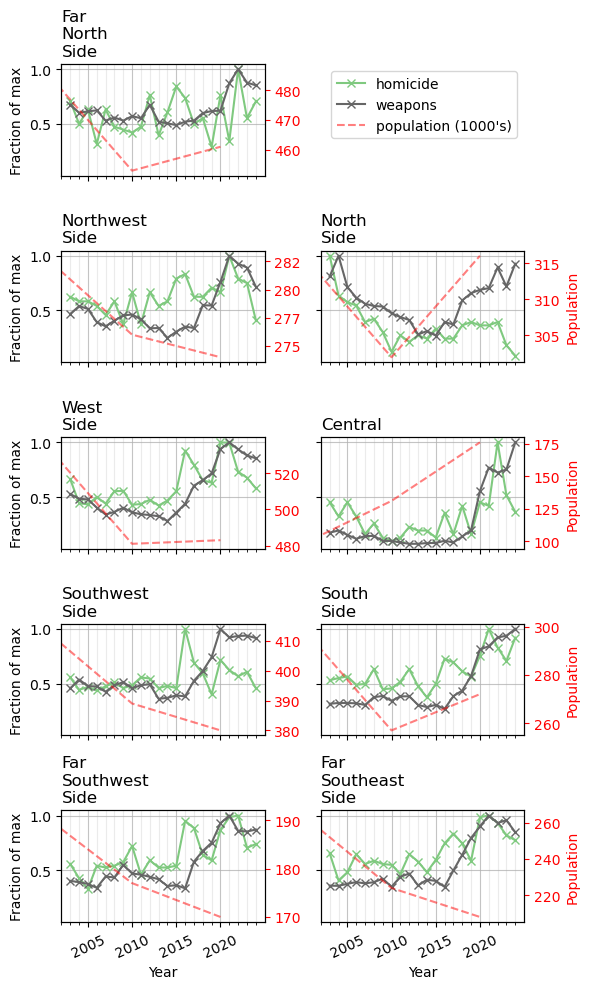

### Stealing

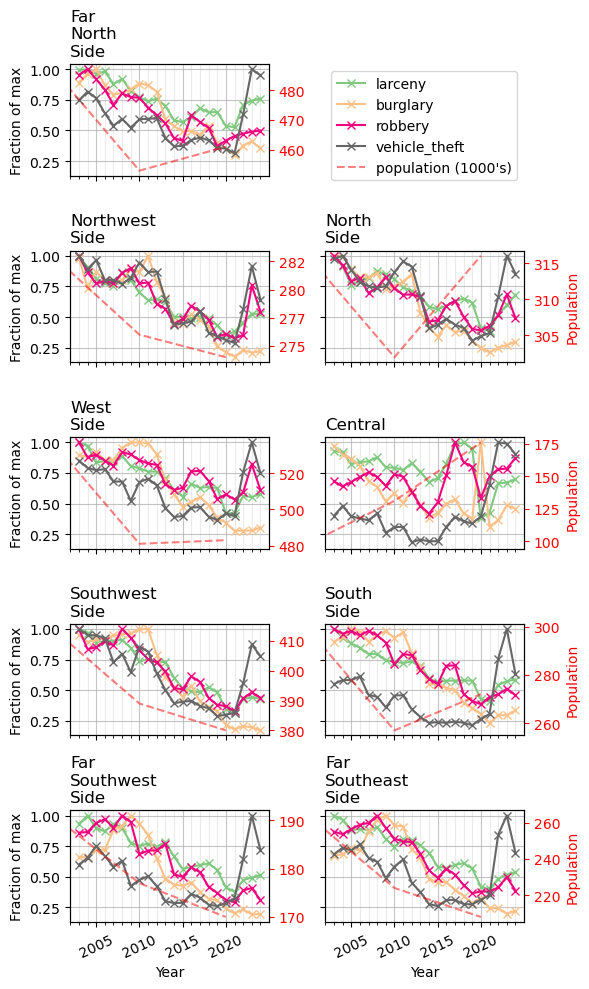

### Assault And Battery

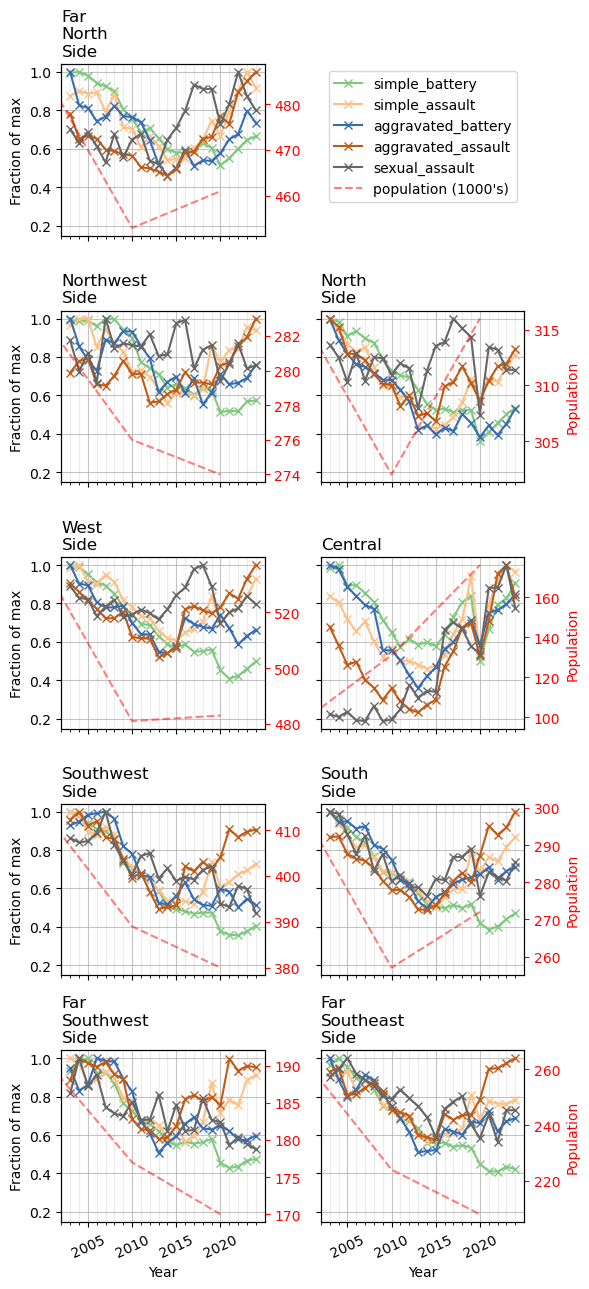

### Society

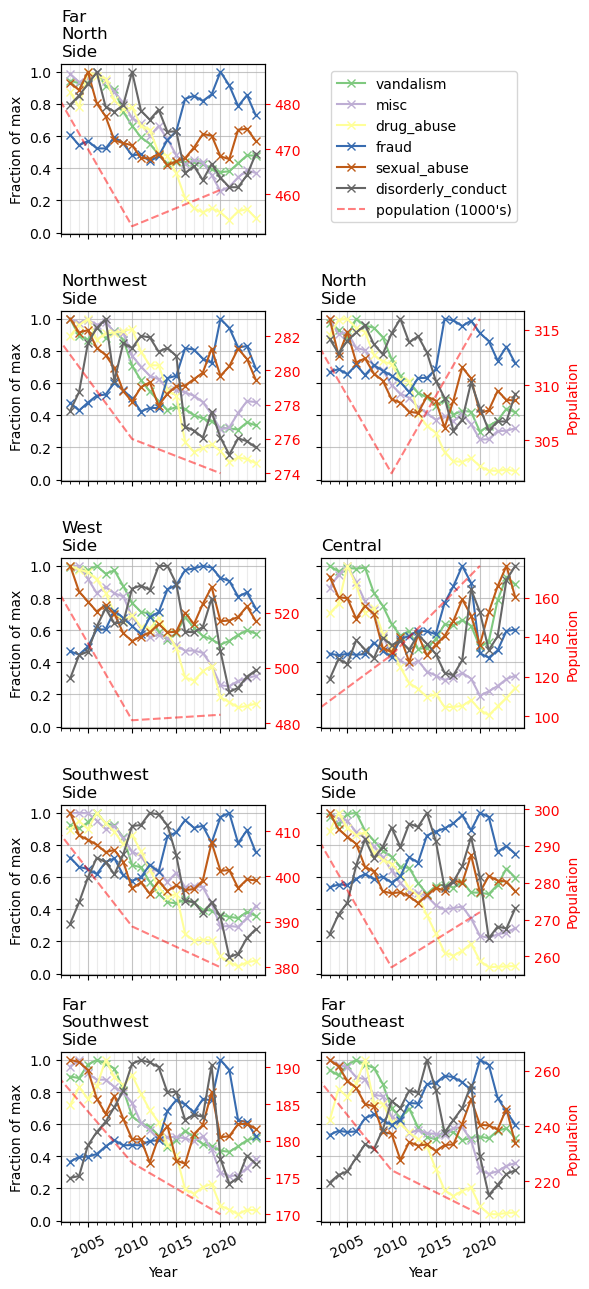

In [13]:
for select_crime_type in select_crime_lists:
    display(Markdown(f"### {select_crime_type.replace('_',' ').title()}"))
    fig = pc.plot_regional_crime(
        crime_by_year_dfs,
        population,
        crime_type,
        select_crimes=select_crime_lists[select_crime_type],
        plot_pop=True,
        show_max_text_box=False
    )
    display(Markdown(matplotlib_fig_to_markdown(fig)))

In [ ]:
select_crime_type = 'stealing'
region = 'South Side'
select_crimes=select_crime_lists[select_crime_type]
data_df = crime_by_year_dfs[(crime_type,'region')].copy()
d = (
    data_df[select_crimes]
    .xs(region,level='region',axis=1)
    .drop(pc.drop_years,errors='ignore')
)